In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
column=boston.feature_names.tolist()

<AxesSubplot:>

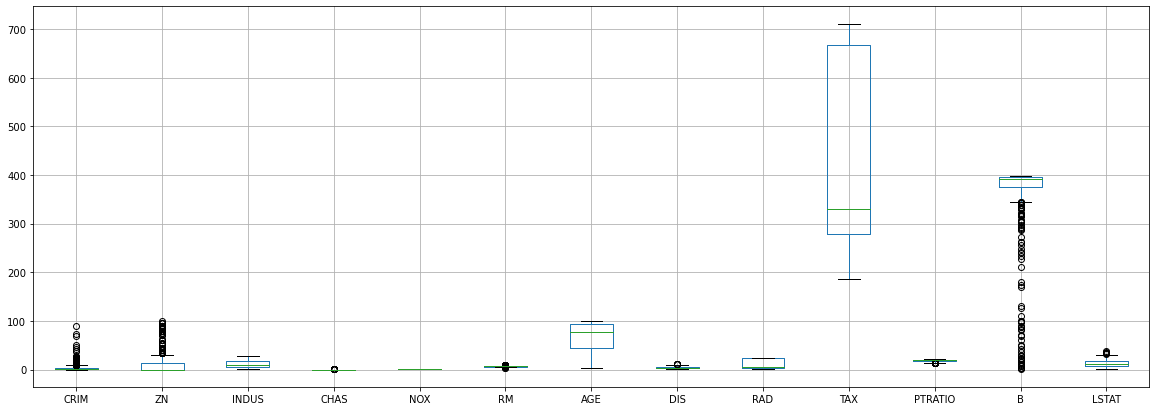

In [6]:
plt.figure(figsize=(20,7))
df.boxplot(column)

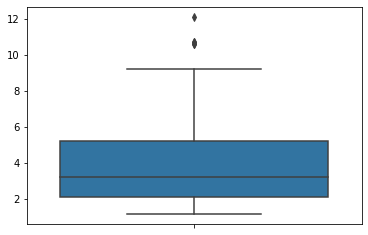

In [7]:
import seaborn as sns
sns.boxplot(y=df['DIS'].values)
plt.show()

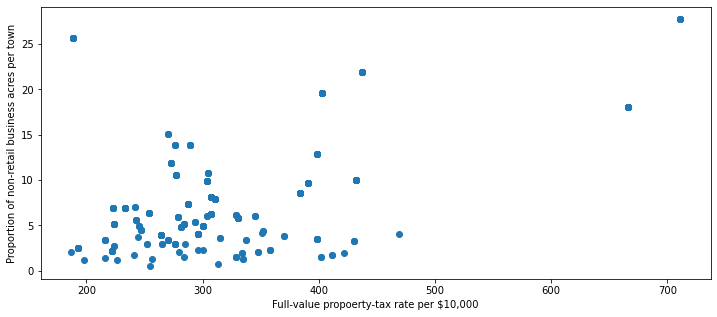

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(df['TAX'], df['INDUS'])
ax.set_ylabel('Proportion of non-retail business acres per town')
ax.set_xlabel('Full-value propoerty-tax rate per $10,000')
plt.show()

In [9]:
#IQR
q1,q3 = np.percentile(df.DIS.values,[25,75])
print("Q1 : ",q1)
print("Q3 : ",q3)
iqr = q3 - q1
print("Interquartile range: ", iqr)

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print("Lower Bound : ", lower_bound)
print("Upper Bound : ", upper_bound)

Q1 :  2.100175
Q3 :  5.1884250000000005
Interquartile range:  3.0882500000000004
Lower Bound :  -2.5322000000000005
Upper Bound :  9.820800000000002


In [10]:
outlier_datapoints_from_IQR = list(df.DIS[df.DIS >= upper_bound].values)

In [11]:
outlier_datapoints_from_IQR

[10.7103, 10.7103, 12.1265, 10.5857, 10.5857]

In [12]:
#Z-score
outliers = []
def detect_outlier(data):
    threshold = 3
    mean_i = np.mean(data)
    std_i = np.std(data)
    for x in data:
        z_score=(x-mean_i)/std_i
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers

In [13]:
outlier_datapoints_from_Z_score = detect_outlier(df['DIS'])
print(outlier_datapoints_from_Z_score)

[10.7103, 10.7103, 12.1265, 10.5857, 10.5857]


In [14]:
#Isolation Forest
from sklearn.ensemble import IsolationForest

In [15]:
new_data = df[['TAX','INDUS']]

In [19]:
clf = IsolationForest(max_samples=100, random_state=2020, contamination=.15)
clf.fit(new_data)
if_anamolies = clf.predict(new_data)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


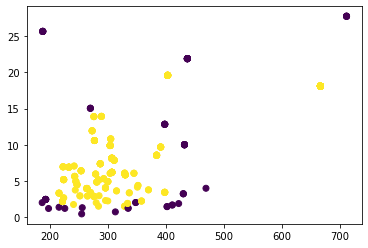

In [20]:
plt.scatter(new_data['TAX'], new_data['INDUS'], c=if_anamolies)
plt.show()

In [21]:
if_anamolies[60:80]

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1])

In [22]:
is_outlier_value = new_data[if_anamolies == -1]

In [23]:
outlier_points_index_in_newdata= list(is_outlier_value.index)
data_without_outliers = new_data.drop(outlier_points_index_in_newdata)

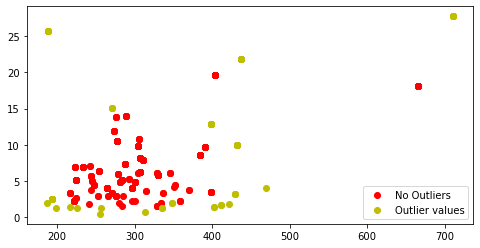

In [24]:
fig, ax1= plt.subplots(figsize=(8,4))
plt.scatter(data_without_outliers['TAX'], data_without_outliers['INDUS'],
           color='r',label='No Outliers')
plt.scatter(is_outlier_value['TAX'], is_outlier_value['INDUS'],
           color='y', label='Outlier values')
plt.legend()
plt.show()

In [25]:
#correcting Outliers
transformed_log10 = pd.DataFrame(np.log10(df['DIS']))
transformed_log2= pd.DataFrame(np.log2(df['DIS']))
transformed_log = pd.DataFrame(np.log1p(df['DIS']))

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[Text(0, 0.5, ' ')]

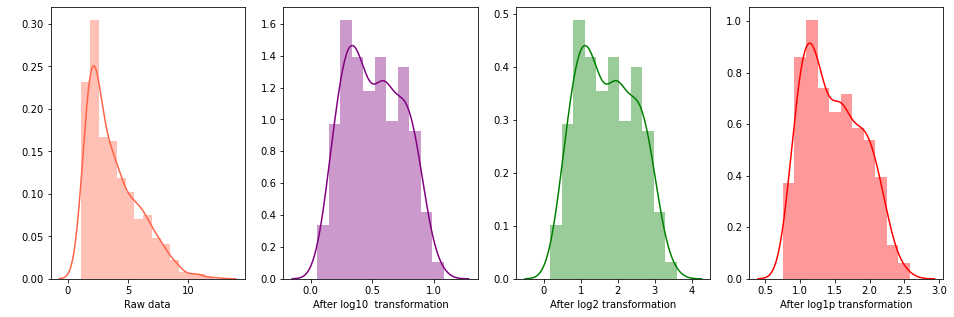

In [26]:
f, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.distplot(  df['DIS'], bins='auto',  ax=axes[0] , color="tomato" )
sns.distplot(transformed_log10, bins='auto', ax=axes[1], color="purple")
sns.distplot(transformed_log2, bins='auto', ax=axes[2], color="green")
sns.distplot(transformed_log, bins='auto', ax=axes[3], color="red")

plt.setp(axes[0], xlabel=f'Raw data')
plt.setp(axes[0], ylabel=f' ')
plt.setp(axes[1], xlabel=f'After log10  transformation')
plt.setp(axes[1], ylabel=f' ')
plt.setp(axes[2], xlabel=f'After log2 transformation')
plt.setp(axes[2], ylabel=f' ')
plt.setp(axes[3], xlabel=f'After log1p transformation')
plt.setp(axes[3], ylabel=f' ')

In [27]:
#POWER TRANSFORM
from sklearn.preprocessing import PowerTransformer

In [28]:
transformers = ['yeo-johnson', 'box-cox']
transformed = []

In [29]:
for transformer in transformers:
    power = PowerTransformer(method=transformer, standardize=True)
    data=df['DIS'].values.reshape(-1,1)
    data_trans = power.fit_transform(data)
    transformed.append(data_trans)

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[Text(0.5, 0, 'After box-cox transformation')]

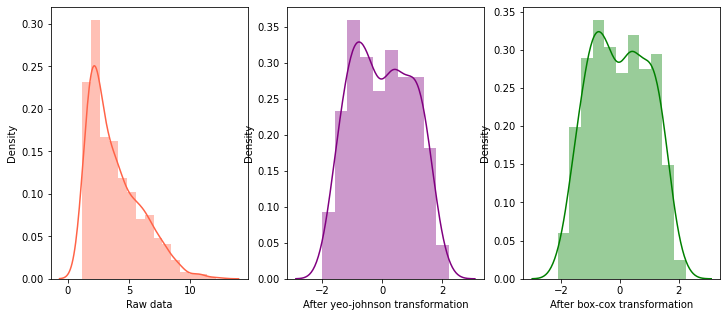

In [30]:
f, axes = plt.subplots(1,3,figsize=(12,5))

sns.distplot(  df['DIS'], bins='auto',  ax=axes[0] , color="tomato" )
sns.distplot(transformed[0], bins='auto', ax=axes[1], color="purple")
sns.distplot(transformed[1], bins='auto', ax=axes[2], color="green")

plt.setp(axes[0], xlabel=f'Raw data')
plt.setp(axes[1], xlabel=f'After {transformers[0]} transformation')
plt.setp(axes[2], xlabel=f'After {transformers[1]} transformation')